# Airbnb Price Engine

This project is related to Supervised Learning and NLP, we are set to analyze a database of Airbnb property listings with the aim of predicting lodging prices for some cities within the USA. This will be achieved through the application of Machine Learning techniques, including Supervised Learning, Natural Language Processing (NLP), and a final assessment using Deep Learning algorithms.

### These are the objectives of the project:

* Develop in Python an EDA (Exploratory Data Analysis) on the dataset in question.
Implement a Machine Learning pipeline in Python to predict the variable 'Price.
* Also, apply a dimensionality reduction method and reattempt to predict the given problem.

### Napolitano Leandro

In [6]:
import sys

IN_COLAB = "google.colab" in sys.modules
IN_COLAB

True

In [7]:
if IN_COLAB:
    from google.colab import drive

    drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
if IN_COLAB:
    ROOT_DIR = "/content/drive/MyDrive/ciencia_datos_TPfinal_airbnb"
    %cd $ROOT_DIR

/content/drive/MyDrive/ciencia_datos_TPfinal_airbnb


In [8]:
if IN_COLAB:
    # Instal dependencies
    !pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [9]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 30)

In [12]:
df = pd.read_csv('airbnb_us.csv')

In [13]:
df.sample(5)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
14697,8973075,Apartment,Entire home/apt,"{""Air conditioning"",""Wheelchair accessible"",Ki...",3,1.0,Real Bed,flexible,False,DC,-3 minute walk to Foggy Bottom Metro stop (ie....,NaN,t,f,NaN,2016-05-17,f,NaN,38.898716,-77.049084,"Furnished 1 BR, Entire Apartment",Foggy Bottom,0,NaN,https://a0.muscache.com/im/pictures/e74f2cd2-f...,20037,0.0,3.0,120.0
6454,12705874,House,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",6,1.5,Real Bed,strict,True,Boston,Come stay in our beautiful house. Free parking...,2016-03-17,t,t,100%,2013-08-19,t,2017-10-01,42.292687,-71.074349,2 bedrooms in Boston Dutch Colonial,Dorchester,4,100.0,https://a0.muscache.com/im/pictures/bfc6695c-9...,02124,2.0,2.0,180.0
7400,7348959,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,moderate,False,DC,This is a nice apartment in the middle of Wash...,2015-10-05,t,f,65%,2013-12-11,f,2015-10-13,38.920922,-77.039370,Delightful apt in Adams Morgan DC!,Adams Morgan,2,100.0,NaN,20009,1.0,1.0,94.0
2587,15535544,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,2.0,Real Bed,strict,True,DC,Top of the line corporate apartment in a brand...,2015-05-04,t,t,98%,2012-07-15,t,2017-05-04,38.905211,-77.018342,2Bd Penthouse by Convention Center!,Mount Vernon Square,165,96.0,https://a0.muscache.com/im/pictures/102074041/...,20001,2.0,4.0,295.0
9700,4267901,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10,2.5,Real Bed,strict,True,Chicago,This rare single-family home in the heart of L...,2017-04-21,t,f,100%,2017-01-11,t,2017-05-01,41.916148,-87.650598,Stunning Lincoln Park single-family,Lincoln Park,2,100.0,https://a0.muscache.com/im/pictures/7fde1086-a...,60614,4.0,6.0,800.0


#### Exploratory Data Analysis (EDA)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19309 non-null  int64  
 1   property_type           19309 non-null  object 
 2   room_type               19309 non-null  object 
 3   amenities               19309 non-null  object 
 4   accommodates            19309 non-null  int64  
 5   bathrooms               19274 non-null  float64
 6   bed_type                19309 non-null  object 
 7   cancellation_policy     19309 non-null  object 
 8   cleaning_fee            19309 non-null  bool   
 9   city                    19309 non-null  object 
 10  description             19309 non-null  object 
 11  first_review            15355 non-null  object 
 12  host_has_profile_pic    19306 non-null  object 
 13  host_identity_verified  19306 non-null  object 
 14  host_response_rate      15013 non-null

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19309.0,1.121819e+07,6.105064e+06,941.000000,6.211289e+06,1.215601e+07,1.639470e+07,2.121545e+07
accommodates,19309.0,3.426485e+00,2.204776e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,19274.0,1.276201e+00,5.867133e-01,0.000000,1.000000e+00,1.000000e+00,1.500000e+00,8.000000e+00
latitude,19309.0,3.972335e+01,1.902391e+00,37.704743,3.778427e+01,3.891502e+01,4.192686e+01,4.239044e+01
longitude,19309.0,-9.313568e+01,2.134489e+01,-122.511500,-1.224134e+02,-8.762574e+01,-7.699888e+01,-7.098505e+01
number_of_reviews,19309.0,2.508670e+01,4.434838e+01,0.000000,1.000000e+00,7.000000e+00,2.800000e+01,5.420000e+02
review_scores_rating,15175.0,9.472237e+01,7.097521e+00,20.000000,9.300000e+01,9.700000e+01,1.000000e+02,1.000000e+02
bedrooms,19292.0,1.361290e+00,9.012116e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
beds,19285.0,1.788800e+00,1.247000e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
price,19309.0,1.952255e+02,2.021842e+02,10.000000,8.700000e+01,1.350000e+02,2.200000e+02,1.999000e+03


Take a look at Target variable: PRICE

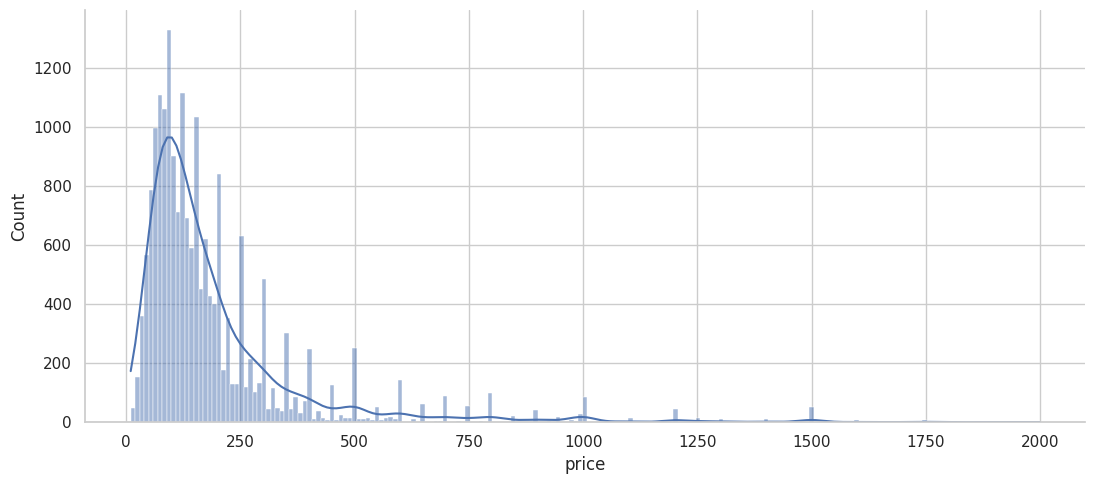

In [16]:
sns.set_theme(style="whitegrid")
sns.displot(data=df, x="price", kde=True, aspect=20/9)

<Axes: xlabel='price'>

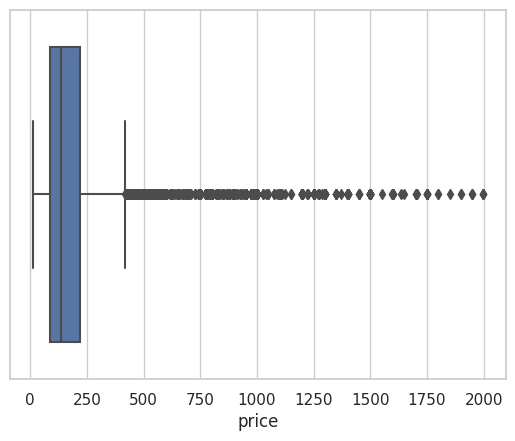

In [17]:
sns.boxplot(data=df, x='price')

Number of columns of each data type

In [21]:
df.dtypes.value_counts()

object     18
float64     7
int64       3
bool        1
dtype: int64

For categorical variables, show the number of distinct values in each column (number of labels).

We can see that there are some features that are almost unique ids

In [22]:
df.select_dtypes(include='object').nunique().sort_values()

host_has_profile_pic          2
instant_bookable              2
host_identity_verified        2
room_type                     3
city                          4
bed_type                      5
cancellation_policy           5
property_type                27
host_response_rate           65
zipcode                     180
neighbourhood               278
last_review                1009
first_review               2038
host_since                 2754
thumbnail_url             16899
amenities                 18012
description               19124
name                      19197
dtype: int64

Analyzing missing data

In [23]:
d = {'Total': df.isna().sum(), 'Percentage': round((df.isna().mean())*100, 1)}
pd.DataFrame(data=d, index=df.columns).sort_values(by='Percentage', ascending=False).head(11)

,Total,Percentage
host_response_rate,4296,22.2
review_scores_rating,4134,21.4
first_review,3954,20.5
last_review,3954,20.5
thumbnail_url,2402,12.4
neighbourhood,1458,7.6
zipcode,225,1.2
bathrooms,35,0.2
beds,24,0.1
bedrooms,17,0.1


#### Analyzing distribution of variables

In [24]:
for column in df.select_dtypes(include='object').nunique()[df.select_dtypes(include='object').nunique()<3000].index:
    print(pd.value_counts(df[column]))
    print('-------------------------------------')

Apartment             11509
House                  4803
Condominium            1568
Townhouse               501
Loft                    205
Other                   171
Bed & Breakfast         135
Guest suite              65
In-law                   64
Guesthouse               55
Dorm                     49
Boutique hotel           47
Timeshare                33
Boat                     30
Hostel                   16
Bungalow                 13
Villa                    11
Camper/RV                10
Cabin                     8
Castle                    4
Serviced apartment        3
Treehouse                 3
Yurt                      2
Tent                      1
Train                     1
Vacation home             1
Cave                      1
Name: property_type, dtype: int64
-------------------------------------
Entire home/apt    12063
Private room        6864
Shared room          382
Name: room_type, dtype: int64
-------------------------------------
Real Bed         18789
Futon 

`room_type` column

                 Total  Percent
Entire home/apt  12063     62.5
Private room      6864     35.5
Shared room        382      2.0


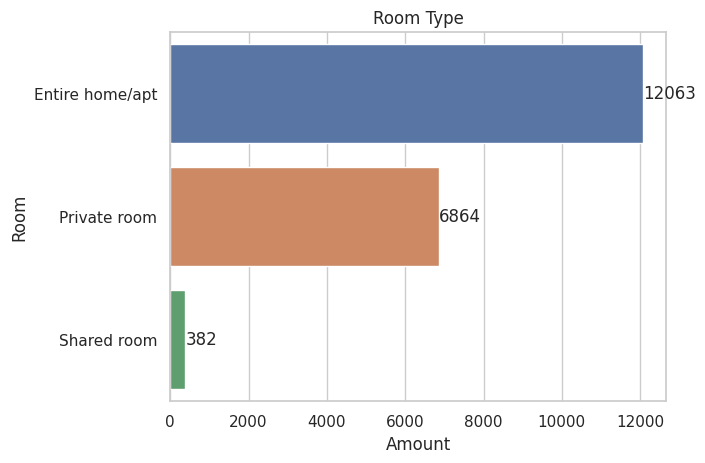

In [25]:
ax = sns.countplot(data=df, y="room_type", order=df.room_type.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('Room Type')
ax.set_xlabel('Amount')
ax.set_ylabel('Room')

room_dict = {'Total': df.room_type.value_counts(), 'Percent': round((df.room_type.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=room_dict, index=df.room_type.value_counts().index))

`bed_type` column

               Total  Percent
Real Bed       18789     97.3
Futon            161      0.8
Airbed           151      0.8
Pull-out Sofa    145      0.8
Couch             63      0.3


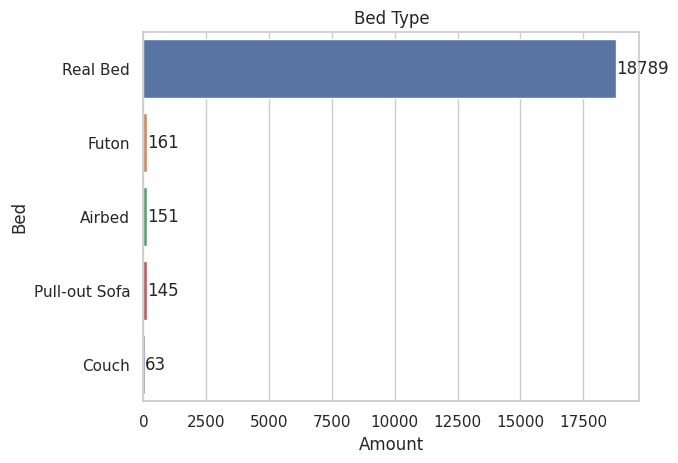

In [26]:
ax = sns.countplot(data=df, y="bed_type", order=df.bed_type.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('Bed Type')
ax.set_xlabel('Amount')
ax.set_ylabel('Bed')

bed_dict = {'Total': df.bed_type.value_counts(), 'Percent': round((df.bed_type.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=bed_dict, index=df.bed_type.value_counts().index))

<Axes: xlabel='price', ylabel='Density'>

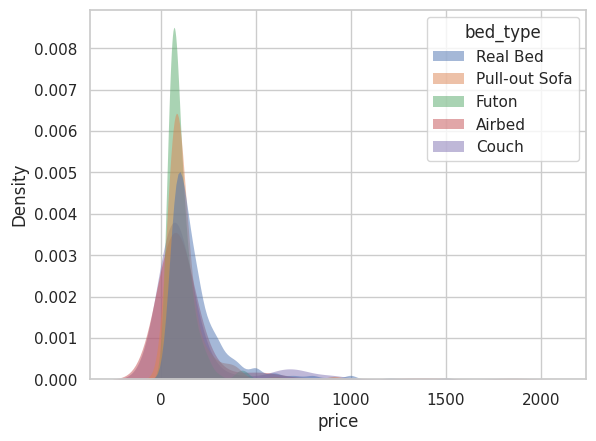

In [27]:
sns.kdeplot(data=df, x="price", hue="bed_type",fill=True, common_norm=False,alpha=.5, linewidth=0)

The categories that are not "Real Bed" seem to add variability to the target, however the variable has very few samples so we are going to eliminate the feature.

`host_has_profile_pic` column

   Total  Percent
t  19250     99.7
f     56      0.3


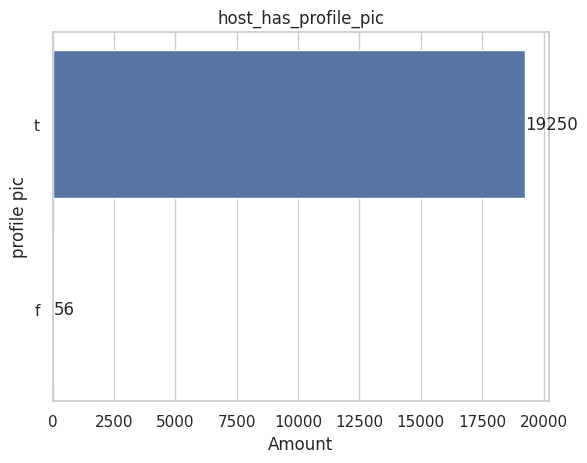

In [28]:
ax = sns.countplot(data=df, y="host_has_profile_pic", order=df.host_has_profile_pic.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('host_has_profile_pic')
ax.set_xlabel('Amount')
ax.set_ylabel('profile pic')

dict_ = {'Total': df.host_has_profile_pic.value_counts(), 'Percent': round((df.host_has_profile_pic.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.host_has_profile_pic.value_counts().index))

In this case, variable 'f' has very few samples, so the decision is made to eliminate the feature.

`instant_bookable` column

   Total  Percent
f  13858     71.8
t   5451     28.2


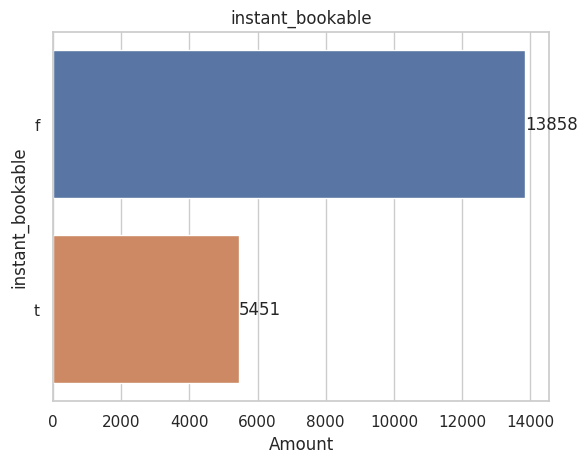

In [29]:
ax = sns.countplot(data=df, y="instant_bookable", order=df.instant_bookable.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('instant_bookable')
ax.set_xlabel('Amount')
ax.set_ylabel('instant_bookable')

dict_ = {'Total': df.instant_bookable.value_counts(), 'Percent': round((df.instant_bookable.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.instant_bookable.value_counts().index))

`host_identity_verified` column

   Total  Percent
t  13586     70.4
f   5720     29.6


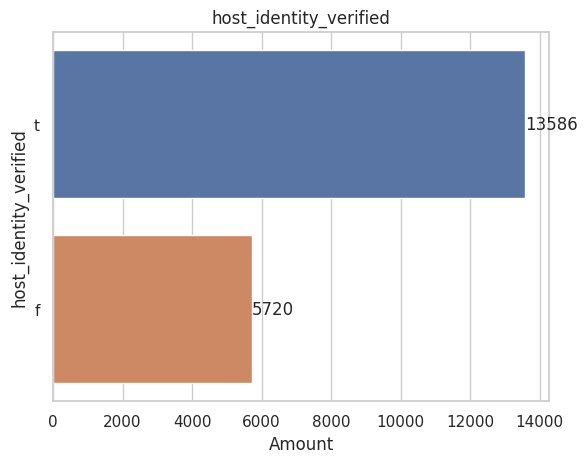

In [30]:
ax = sns.countplot(data=df, y="host_identity_verified", order=df.host_identity_verified.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('host_identity_verified')
ax.set_xlabel('Amount')
ax.set_ylabel('host_identity_verified')

dict_ = {'Total': df.host_identity_verified.value_counts(), 'Percent': round((df.host_identity_verified.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.host_identity_verified.value_counts().index))

`city` column

         Total  Percent
SF        6434     33.3
DC        5688     29.5
Chicago   3719     19.3
Boston    3468     18.0


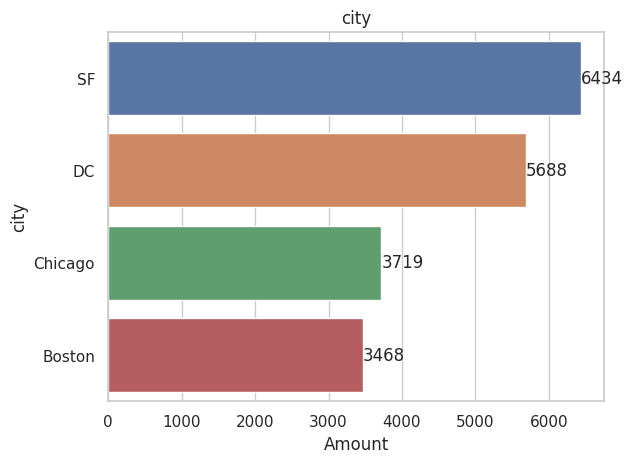

In [31]:
ax = sns.countplot(data=df, y="city", order=df.city.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('city')
ax.set_xlabel('Amount')
ax.set_ylabel('city')

dict_ = {'Total': df.city.value_counts(), 'Percent': round((df.city.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.city.value_counts().index))

`cancellation_policy` column

                 Total  Percent
strict            8008     41.5
flexible          5739     29.7
moderate          5455     28.3
super_strict_30    102      0.5
super_strict_60      5      0.0


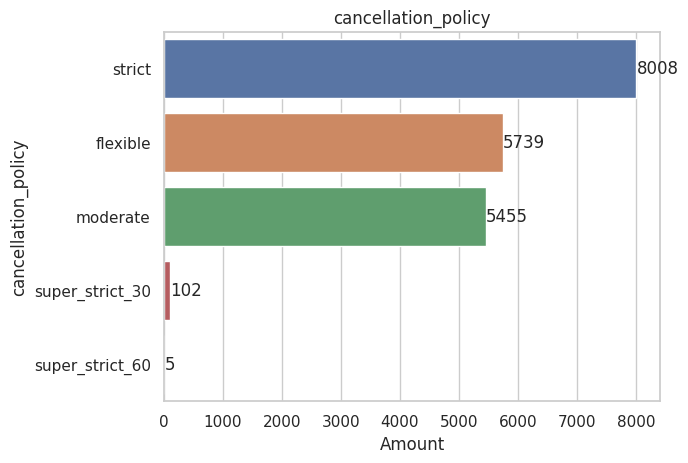

In [32]:
ax = sns.countplot(data=df, y="cancellation_policy", order=df.cancellation_policy.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('cancellation_policy')
ax.set_xlabel('Amount')
ax.set_ylabel('cancellation_policy')

dict_ = {'Total': df.cancellation_policy.value_counts(), 'Percent': round((df.cancellation_policy.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.cancellation_policy.value_counts().index))

`property_type` column

                    Total  Percent
Apartment           11509     59.6
House                4803     24.9
Condominium          1568      8.1
Townhouse             501      2.6
Loft                  205      1.1
Other                 171      0.9
Bed & Breakfast       135      0.7
Guest suite            65      0.3
In-law                 64      0.3
Guesthouse             55      0.3
Dorm                   49      0.3
Boutique hotel         47      0.2
Timeshare              33      0.2
Boat                   30      0.2
Hostel                 16      0.1
Bungalow               13      0.1
Villa                  11      0.1
Camper/RV              10      0.1
Cabin                   8      0.0
Castle                  4      0.0
Serviced apartment      3      0.0
Treehouse               3      0.0
Yurt                    2      0.0
Tent                    1      0.0
Train                   1      0.0
Vacation home           1      0.0
Cave                    1      0.0


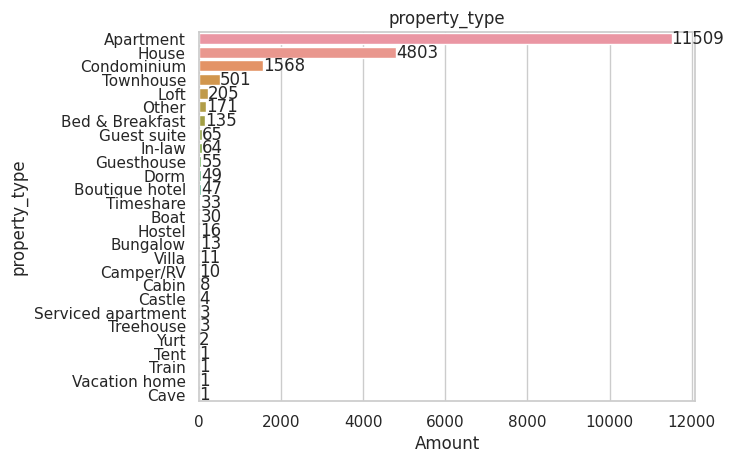

In [33]:
ax = sns.countplot(data=df, y="property_type", order=df.property_type.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('property_type')
ax.set_xlabel('Amount')
ax.set_ylabel('property_type')

dict_ = {'Total': df.property_type.value_counts(), 'Percent': round((df.property_type.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.property_type.value_counts().index))

`neighbourhood` column

                          Total  Percent
Mission District            784      4.4
Capitol Hill                526      2.9
Allston-Brighton            414      2.3
Richmond District           398      2.2
SoMa                        397      2.2
...                         ...      ...
Garfield Heights              1      0.0
Chevy Chase, MD               1      0.0
Mt. Pleasant                  1      0.0
Suitland-Silver Hill, MD      1      0.0
Watertown                     1      0.0

[278 rows x 2 columns]


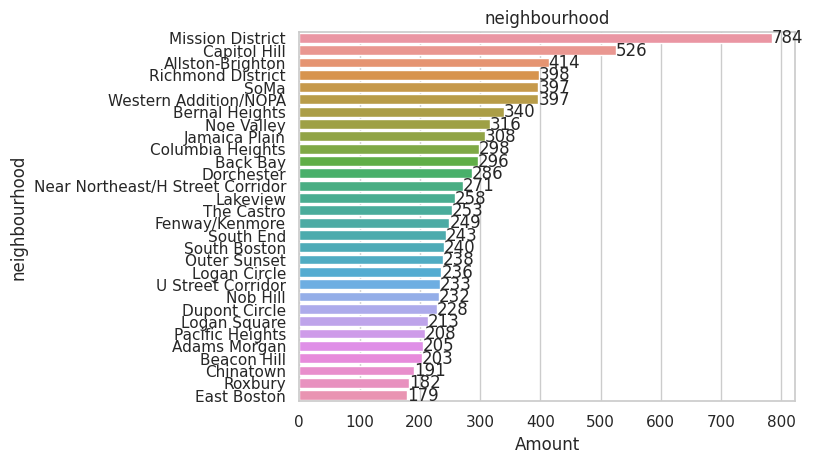

In [34]:
ax = sns.countplot(data=df, y="neighbourhood", order=df.neighbourhood.value_counts().head(30).index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('neighbourhood')
ax.set_xlabel('Amount')
ax.set_ylabel('neighbourhood')

dict_ = {'Total': df.neighbourhood.value_counts(), 'Percent': round((df.neighbourhood.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.neighbourhood.value_counts().index))

`host_response_rate` column -> it has low samples for lower ratings, this feature is going to be considered as numerical

      Total  Percent
100%  12079     80.5
90%     536      3.6
80%     232      1.5
99%     163      1.1
94%     134      0.9
...     ...      ...
58%       2      0.0
31%       1      0.0
13%       1      0.0
46%       1      0.0
42%       1      0.0

[65 rows x 2 columns]


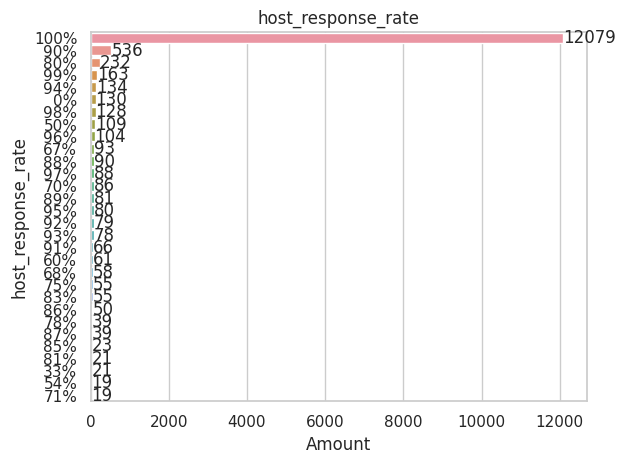

In [35]:
ax = sns.countplot(data=df, y="host_response_rate", order=df.host_response_rate.value_counts().head(30).index)
for label in ax.containers:
    ax.bar_label(label)


ax.set_title('host_response_rate')
ax.set_xlabel('Amount')
ax.set_ylabel('host_response_rate')

dict_ = {'Total': df.host_response_rate.value_counts(), 'Percent': round((df.host_response_rate.value_counts(normalize=True))*100, 1)}
print(pd.DataFrame(data=dict_, index=df.host_response_rate.value_counts().index))

#### Analyzing categorical variables vs Target (considering outliers)

It can be seen good variability in this features (unless host_identity and instant bookable)

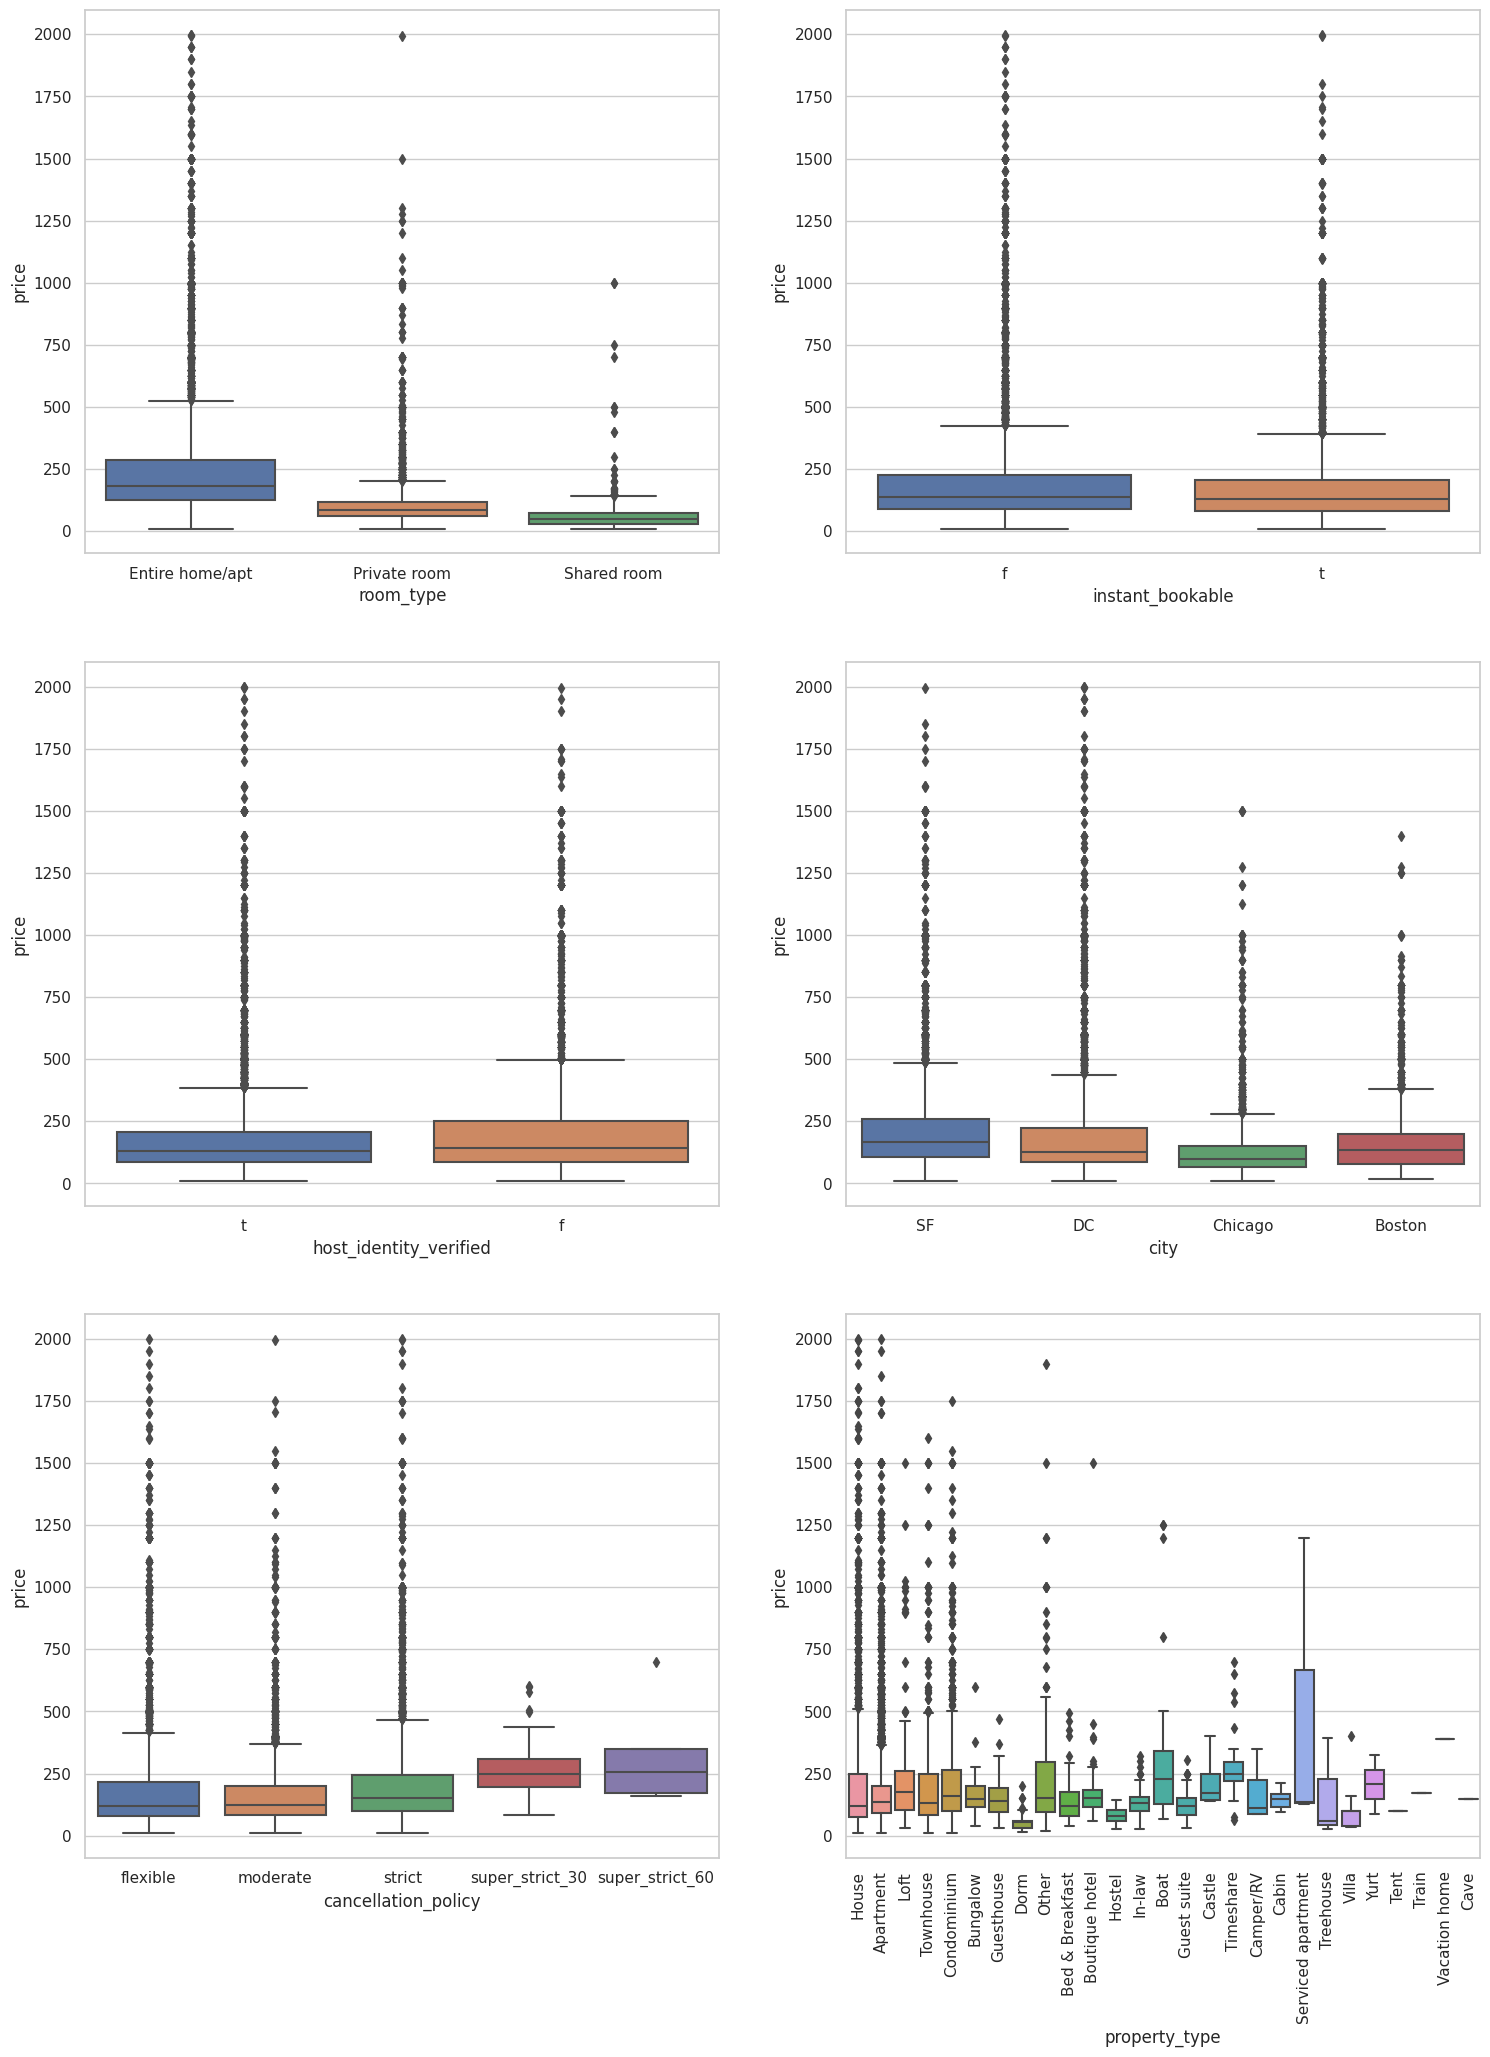

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,24))

sns.boxplot(data=df, x='room_type', y='price', ax=axes[0,0])
sns.boxplot(data=df, x='instant_bookable', y='price', ax=axes[0,1])
sns.boxplot(data=df, x='host_identity_verified', y='price', ax=axes[1,0])
sns.boxplot(data=df, x='city', y='price', ax=axes[1,1])
sns.boxplot(data=df, x='cancellation_policy', y='price', ax=axes[2,0])
sns.boxplot(data=df, x='property_type', y='price', ax=axes[2,1])
plt.xticks(rotation='vertical')

plt.show()

<ipython-input-37-5d22e537d270>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="price", hue="property_type",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[2,1])


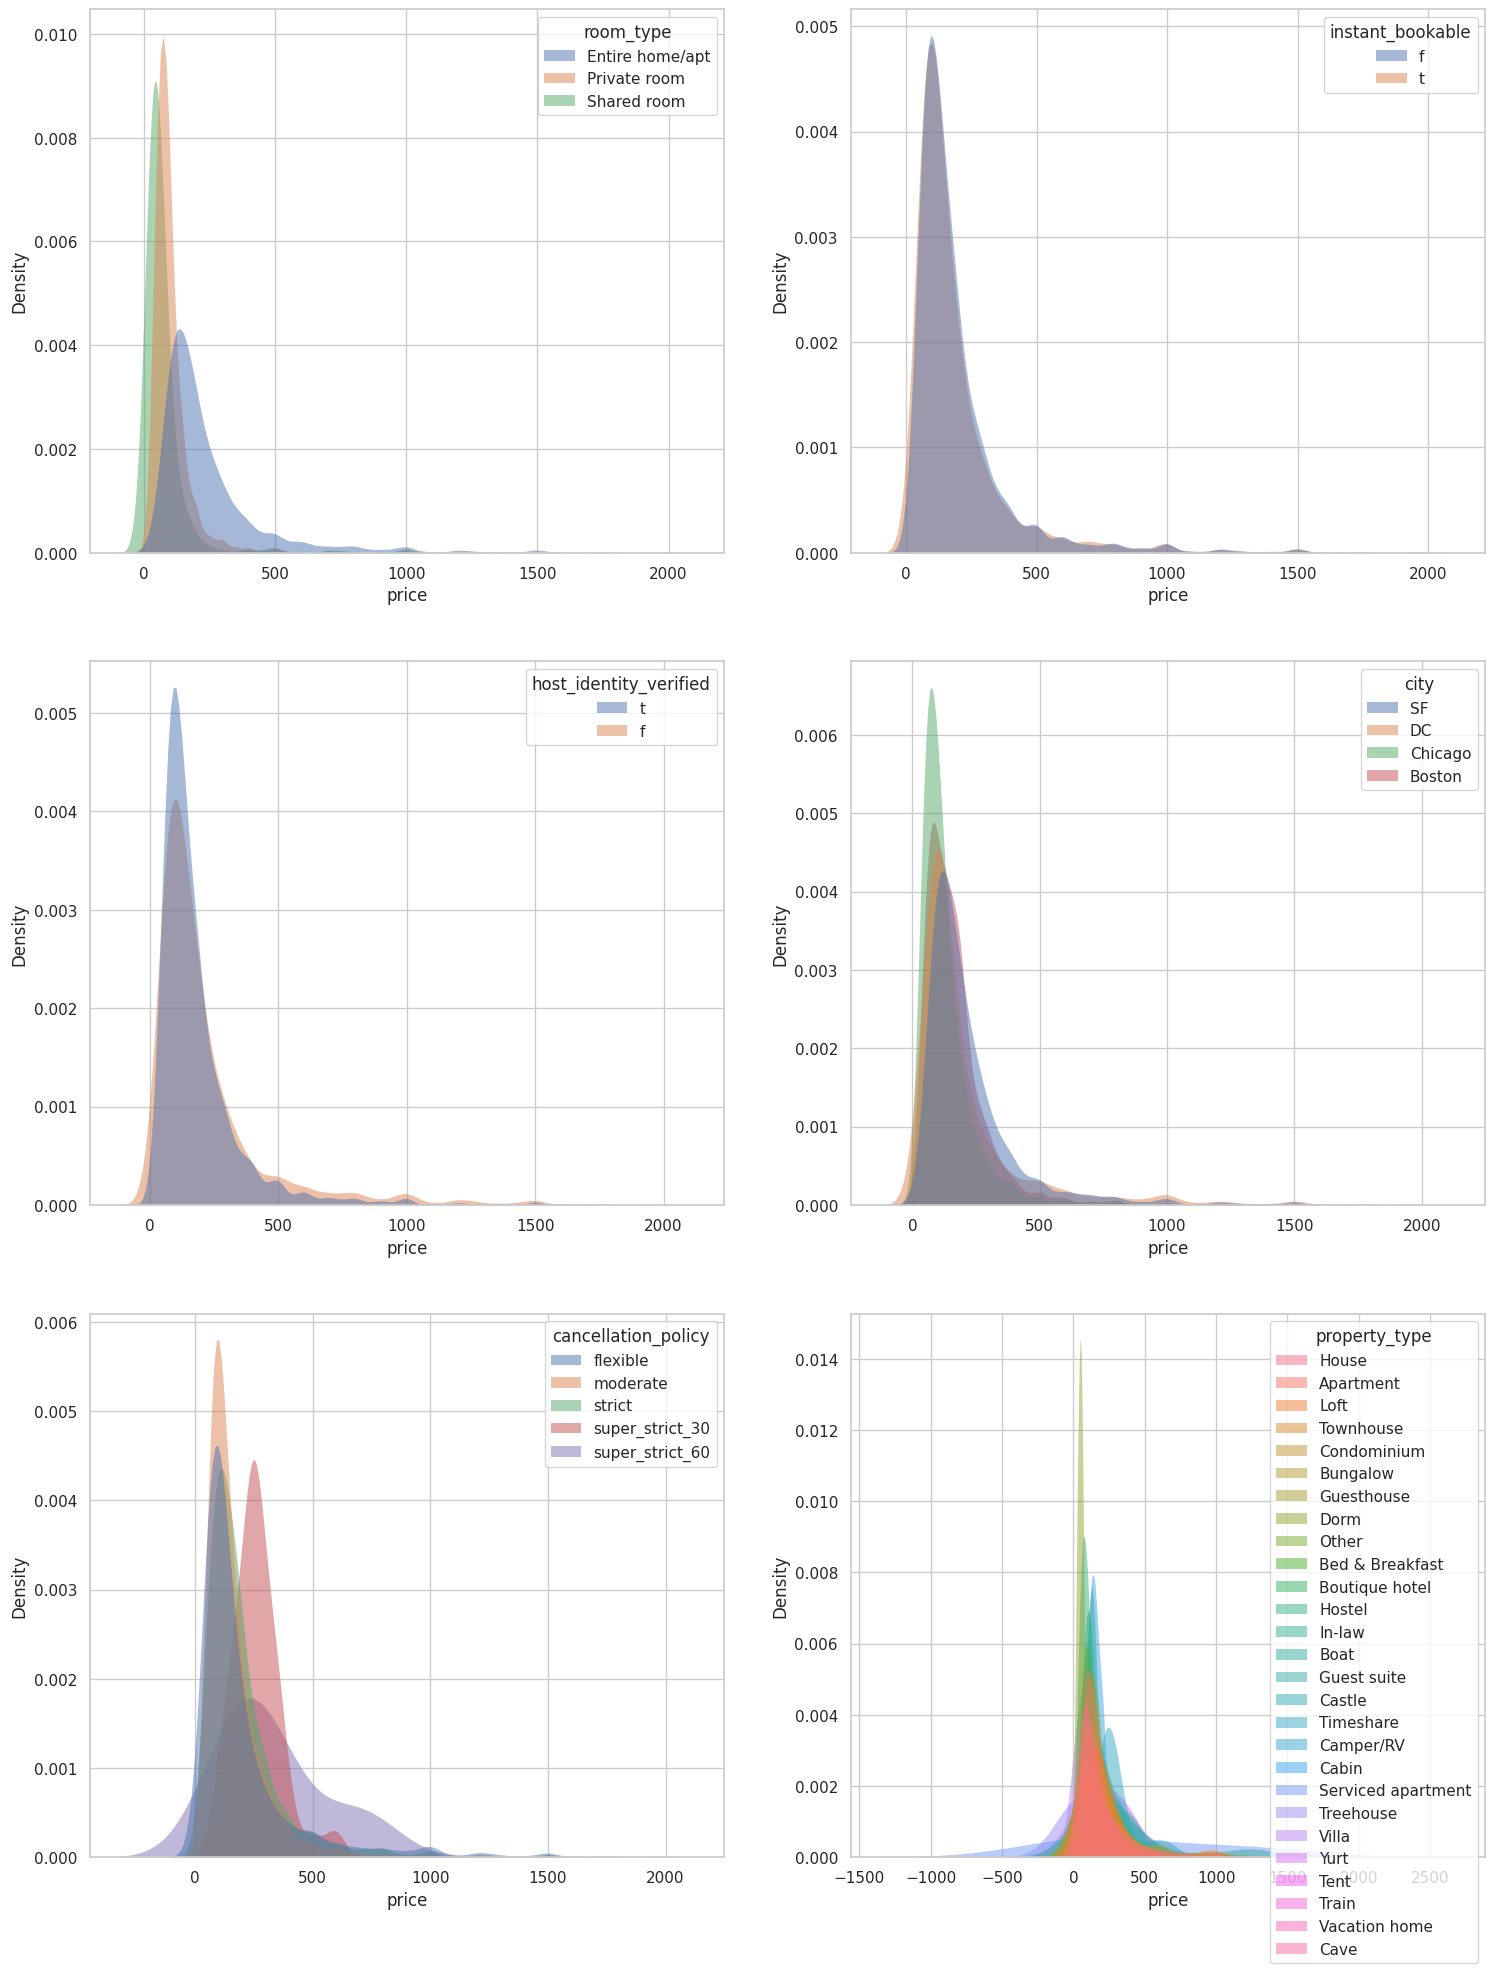

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,24))

sns.kdeplot(data=df, x="price", hue="room_type",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[0,0])
sns.kdeplot(data=df, x="price", hue="instant_bookable",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[0,1])
sns.kdeplot(data=df, x="price", hue="host_identity_verified",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[1,0])
sns.kdeplot(data=df, x="price", hue="city",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[1,1])
sns.kdeplot(data=df, x="price", hue="cancellation_policy",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[2,0])
sns.kdeplot(data=df, x="price", hue="property_type",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[2,1])

plt.show()

#### Analyzing numeric variables

In [38]:
df.select_dtypes(exclude='object').iloc[:,1:]

,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
0,4,1.0,True,37.772004,-122.431619,0,NaN,2.0,2.0,750.0
1,2,1.0,True,38.925627,-77.034596,4,40.0,0.0,1.0,115.0
2,2,1.0,True,37.753164,-122.429526,3,100.0,1.0,1.0,85.0
3,2,1.0,True,37.781128,-122.501095,159,99.0,1.0,1.0,120.0
4,6,1.5,True,38.919630,-77.031189,13,89.0,2.0,3.0,200.0
...,...,...,...,...,...,...,...,...,...,...
19304,5,2.5,False,38.898517,-76.980518,3,90.0,2.0,2.0,135.0
19305,4,2.0,True,41.910698,-87.641210,15,96.0,2.0,3.0,110.0
19306,4,1.0,True,38.921312,-77.028127,19,91.0,1.0,1.0,141.0
19307,2,1.0,True,37.789989,-122.407384,24,98.0,1.0,1.0,170.0


There are some features here that may be categories, let's take a look

In [39]:
numeric_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

for column in numeric_columns:

    print('------------------------------------')
    print(df[column].value_counts())

------------------------------------
2     7581
4     3728
3     1975
1     1831
6     1697
5     1117
8      589
7      268
10     207
9       87
12      79
16      66
14      30
11      21
15      20
13      13
Name: accommodates, dtype: int64
------------------------------------
1.0    14270
2.0     2425
1.5     1316
2.5      645
3.0      248
3.5      170
4.0       52
0.0       48
0.5       42
4.5       26
8.0       12
5.0       11
6.0        5
6.5        3
5.5        1
Name: bathrooms, dtype: int64
------------------------------------
1.0     11901
2.0      3720
0.0      1630
3.0      1461
4.0       436
5.0        98
6.0        31
7.0         8
8.0         3
9.0         2
10.0        2
Name: bedrooms, dtype: int64
------------------------------------
1.0     10751
2.0      5001
3.0      1897
4.0       912
5.0       373
6.0       185
7.0        59
8.0        46
9.0        21
10.0       13
16.0        7
12.0        7
11.0        6
13.0        3
0.0         2
14.0        1
15.0       

Keep this variables as numeric, to do not increase dimensionality

In [40]:
df_plotted = df.drop('id', axis=1)


g = sns.PairGrid(df_plotted, hue='city')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

Correlations

<Axes: >

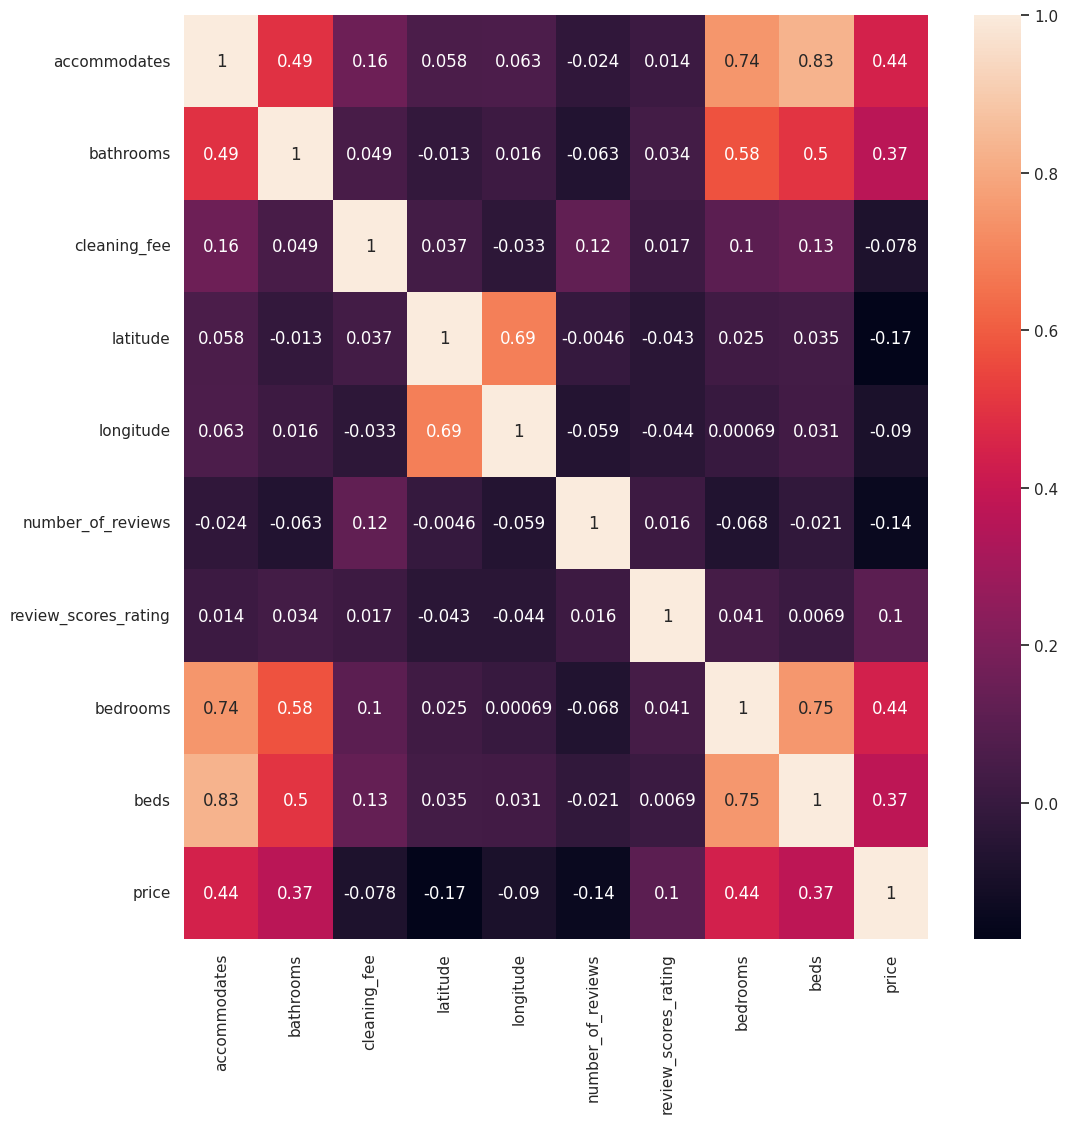

In [41]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_plotted.corr(numeric_only=True), annot=True)

#### Preprocessing

Cast datetime features

In [45]:
df = pd.read_csv('airbnb_us.csv')

In [46]:
df.host_since = pd.to_datetime(df.host_since)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

Check correlations

first_review and last_review may be are useful

In [51]:
df[['host_since', 'first_review', 'last_review', 'price']].astype(int).corr()

,host_since,first_review,last_review,price
host_since,1.000000,-0.056775,-0.058149,0.009935
first_review,-0.056775,1.000000,0.999961,-0.295752
last_review,-0.058149,0.999961,1.000000,-0.295643
price,0.009935,-0.295752,-0.295643,1.000000


## Columns to drop:

`id`: it doesn't add useful info

`host_since`: it doesn't have useful info (low corr)

`zipcode`: we have already long and lat, this code would add a lot of dimensionality to X

`thumbnail_url`: it doesn't have useful info

`host_has_profile_pic`: unbalanced categories

`bed_type`: unbalanced categories

In [52]:
df.drop(['id', 'host_since', 'zipcode', 'thumbnail_url', 'host_has_profile_pic', 'bed_type'], axis=1, inplace=True)

categorize `property_type`, `neighbourhood`, `cancellation_policy` categories with low samples as "Other"

In [53]:
cat_tresholds = {'property_type': 100, 'neighbourhood': 15} #100, 15

first we must drop samples with neighbourhood null values

In [54]:
df.neighbourhood.isnull().sum()

1458

In [55]:
df[df['neighbourhood'].isnull()].sample(3)

,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,price
12189,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,moderate,True,DC,"Close to Georgia Ave / Petworth Metro Station,...",2016-07-04,t,100%,f,2017-05-02,38.932753,-77.024180,1BD/BR Walk 2 Metro & More,NaN,85,99.0,1.0,1.0,74.0
17646,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,strict,True,DC,"One-bedroom condo, walking distance to Brookla...",2017-01-22,t,100%,f,2017-04-24,38.927286,-76.997202,Comfortable & Convinient to Metro and Landmarks,NaN,4,100.0,1.0,2.0,130.0
5860,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",1,1.0,strict,True,DC,Furnished living room with a couch to sleep on...,2016-02-07,t,100%,f,2017-01-31,38.937169,-77.074239,Charming cozy studio near American U.,NaN,8,97.0,1.0,1.0,71.0


In [56]:
df.dropna(subset=['neighbourhood'],inplace=True)

In [57]:
df = df.reset_index(drop=True)

In [58]:
df.neighbourhood.value_counts()

Mission District            784
Capitol Hill                526
Allston-Brighton            414
Richmond District           398
SoMa                        397
                           ... 
Garfield Heights              1
Chevy Chase, MD               1
Mt. Pleasant                  1
Suitland-Silver Hill, MD      1
Watertown                     1
Name: neighbourhood, Length: 278, dtype: int64

In [59]:
def cast_others(df: pd.DataFrame, cat_dict: dict, new_cat: str) -> pd.DataFrame:
    """
    This function takes category names and variable thresholds and sets 'Other' to the categories that are under the threshold

    Args:
        df_products: pd.DataFrame

        cat_dict: dict
        dict with label names and thresholds

        new_cat: str
        new category name

    Returns:
        df_products: pd.DataFrame
        Database with generalized categories
    """

    for key, value in cat_dict.items():
        others_cats = (
            df[key]
            .value_counts()[(df[key].value_counts() < value)]
            .index
        )

        df[key] = df[key].apply(
            lambda x: new_cat if x in others_cats else x
        )

    return df

In [60]:
df2 = cast_others(df, cat_tresholds, 'Other')

In [61]:
df2 = cast_others(df2, {'cancellation_policy': 110}, 'super_strict')

In [62]:
df2.shape

(17851, 23)

In [63]:
df2.property_type.value_counts()

Apartment          10581
House               4447
Condominium         1469
Other                568
Townhouse            467
Loft                 192
Bed & Breakfast      127
Name: property_type, dtype: int64

In [64]:
df2.cancellation_policy.value_counts()

strict          7472
flexible        5251
moderate        5030
super_strict      98
Name: cancellation_policy, dtype: int64

In [65]:
df2.neighbourhood.value_counts()

Mission District     784
Other                536
Capitol Hill         526
Allston-Brighton     414
Richmond District    398
                    ... 
Near West Side        17
Diamond Heights       17
Shepherd Park         16
Cathedral Heights     15
Oakland               15
Name: neighbourhood, Length: 162, dtype: int64

## Handling missing data

In [66]:
d = {'Total': df2.isna().sum(), 'Percentage': round((df.isna().mean())*100, 1)}
pd.DataFrame(data=d, index=df.columns).sort_values(by='Percentage', ascending=False).head(7)

,Total,Percentage
host_response_rate,4095,22.9
review_scores_rating,3813,21.4
last_review,3644,20.4
first_review,3644,20.4
bathrooms,35,0.2
beds,19,0.1
bedrooms,14,0.1


Option 1: drop all nulls (chosen decision due to the improvement of a 5% on scoring vs option 2)

In [67]:
#drop all
df2 = df2.dropna().reset_index(drop=True)

cast `host_response_rate` to float

In [68]:
df2.host_response_rate = df2.host_response_rate.str.replace('%','').astype('float')

In [69]:
df2.host_response_rate

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
11983    100.0
11984    100.0
11985     90.0
11986    100.0
11987    100.0
Name: host_response_rate, Length: 11988, dtype: float64

Option 2: Imputing missing data (this was not the final decision)

In [ ]:
df2[['host_response_rate', 'review_scores_rating', 'bathrooms', 'beds', 'bedrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,13756.0,96.083309,12.858887,0.0,100.0,100.0,100.0,100.0
review_scores_rating,14038.0,94.733295,6.997783,20.0,93.0,97.0,100.0,100.0
bathrooms,17816.0,1.278177,0.591542,0.0,1.0,1.0,1.5,8.0
beds,17832.0,1.791555,1.255713,0.0,1.0,1.0,2.0,16.0
bedrooms,17837.0,1.364131,0.904809,0.0,1.0,1.0,2.0,10.0


it seems like there are null values because there are properties without reviews (or few). This values will be imputed by median

In [ ]:
df2[df2['review_scores_rating'].isnull()].sample(3)

,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,price
2631,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",3,1.0,moderate,True,DC,"Gorgeous, large private Georgetown apartment f...",-9223372036854775808,t,NaN,f,-9223372036854775808,38.911555,-77.060788,Kosher Georgetown Lrg One Bdrm Apt,Georgetown,0,NaN,1.0,2.0,375.0
10897,Apartment,Entire home/apt,"{""Pets allowed"",""Family/kid friendly""}",6,2.0,flexible,False,SF,s,-9223372036854775808,f,NaN,t,-9223372036854775808,37.776557,-122.416875,"SF Luxury Private 2BD/2BA, Close to everything!",SoMa,0,NaN,2.0,5.0,340.0
11002,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,flexible,False,DC,The newly renovated apartment home feels like ...,-9223372036854775808,f,100.0,f,-9223372036854775808,38.893498,-76.978341,KING Bed Walk to Metro Free Prkg,Kingman Park,0,NaN,1.0,2.0,140.0


In [ ]:
df2['review_scores_rating'].value_counts()

review_scores_rating
100.0    3869
98.0     1293
97.0     1155
96.0     1071
95.0      989
99.0      870
93.0      844
94.0      609
90.0      594
92.0      481
80.0      429
91.0      354
87.0      259
89.0      232
88.0      221
85.0      141
84.0       96
86.0       87
83.0       83
60.0       75
82.0       33
70.0       33
73.0       28
81.0       26
75.0       23
78.0       19
20.0       17
67.0       16
40.0       16
79.0       13
77.0       11
76.0       10
72.0        8
74.0        8
65.0        7
68.0        5
50.0        4
71.0        2
47.0        2
63.0        2
64.0        1
66.0        1
69.0        1
Name: count, dtype: int64

In [ ]:
df2.groupby('city')['review_scores_rating'].agg({'mean', 'median'})

,mean,median
city,,
Boston,93.597518,96.0
Chicago,95.256574,97.0
DC,94.827262,97.0
SF,95.026775,97.0


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
df2['review_scores_rating'] = imp_mean.fit_transform(np.array(df2['review_scores_rating']).reshape(-1,1))

let's look at `host_response_rate`

it seems that the null values correspond to new hosts in airbnb. This values will be imputed by median

In [ ]:
df2[df2['host_response_rate'].isnull()].sample(3)

,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,price
7703,House,Private room,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",4,1.5,flexible,False,SF,This Private Room contains 2 full sized beds. ...,f,NaN,f,37.771906,-122.506699,Super Bowl for 4,Richmond District,0,97.0,1.0,2.0,700.0
13999,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,2.5,moderate,True,DC,My home is located three minutes from the hear...,f,NaN,t,38.910961,-77.086066,2017 INAUGURATION HOME,Palisades,0,97.0,2.0,2.0,1500.0
3449,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,flexible,False,DC,"Close to all amenities, law school, Safeway, l...",f,NaN,f,38.900811,-77.018835,Beautiful luxury apt. on Mass Ave.,Judiciary Square,0,97.0,1.0,2.0,115.0


In [ ]:
df2.groupby('city')['host_response_rate'].agg({'mean', 'median'})

,mean,median
city,,
Boston,96.891583,100.0
Chicago,96.339076,100.0
DC,94.766156,100.0
SF,96.437261,100.0


In [ ]:
df2['host_response_rate'] = imp_mean.fit_transform(np.array(df2['host_response_rate']).reshape(-1,1))

`Bathrooms`, `bedrooms` and `beds`: filling null values

In this case we have to take into account that the decimal part (0.5) means "half bathroom" which means that this type of bathroom does not have shower or tub in it

In [ ]:
cols = ['bathrooms','bedrooms','beds']

for col in cols:

    print('--------------------------------------')
    print(df2[col].value_counts(dropna=False))

--------------------------------------
bathrooms
1.0    13180
2.0     2254
1.5     1211
2.5      593
3.0      235
3.5      155
4.0       49
0.0       44
0.5       37
NaN       35
4.5       26
8.0       12
5.0       11
6.0        5
6.5        3
5.5        1
Name: count, dtype: int64
--------------------------------------
bedrooms
1.0     10945
2.0      3468
0.0      1522
3.0      1362
4.0       406
5.0        89
6.0        31
NaN        14
7.0         8
9.0         2
10.0        2
8.0         2
Name: count, dtype: int64
--------------------------------------
beds
1.0     9930
2.0     4637
3.0     1742
4.0      848
5.0      346
6.0      170
7.0       58
8.0       40
9.0       21
NaN       19
10.0      13
16.0       7
12.0       7
11.0       6
13.0       3
0.0        2
14.0       1
15.0       1
Name: count, dtype: int64


In this desc we verify see that the apartment actually has one complete bath

In [ ]:
df[df.bathrooms.isnull()].description[577]

'Studio apartment in great location!'

In this case the place to rent is a room, and it would have private bath or a shared one

In [ ]:
df[df.bathrooms.isnull()].description[682]

'This is a very small  studio apartment with a private entrance.  The apartment is located on the rear half of our first floor. It has its own entrance. It consists of a kitchen and a small bedroom with a queen sized bed (new since October 2016) and bathroom with a tub and shower.  There is a kitchen with a stove and mini fridge and sink and microwave plus a small table for two. We have a Roku Box for tv watching and excellent cable internet. The Roku has Amazon Prime, Netflix and a bunch of other channels. We have hi-speed Comcast internet. You will be in your own intact tiny apartment. You will not see me or my family at all unless you run into us outdoors. My family lives in the building but we are not home 24/7. We are available to answer questions, especially via email.  Guests let themselves in with a key code and generally have total privacy from us unless they need help with anything. Ukrainian Village was just named "Hottest Neighborhood in America" by Trulia. Our address has 

In [ ]:
df[df.bathrooms.isnull()].description[1175]

'My home is very communal. Students and interns who stay with me tend to become fast friends with each other. I organize weekly house events, such as Sunday brunches or game nights or a night out at the movies. I pride myself on being a "house mom". I\'ll give you tips on where to go in the city, make you tea when you are home sick, or take you on an adventure. You might see our home listed by Darren O. however this is actually my home (where I live) so I thought I would create my own listing as well.   You can book through him or through me...but either way you\'ll be living with me.    This private house is set up to provide students and interns visiting San Francisco with a safe and comfortable place to stay that has a built in community of international travelers.   Why come to San Francisco and stay in a place all by yourself?    If you\'re friendly and social and would like to live in a fun house with students from all over the world, check us out.    You should know that living 

We conclude that the null values will be imputed by 1, as all of them (wheter are shared or private) have at least 1 (and it has to do with its median)

On the other hand, both beds and bedrooms will be imputed with median as well (1)

In [ ]:
df2[['bathrooms', 'beds', 'bedrooms']] = imp_mean.fit_transform(df2[['bathrooms', 'beds', 'bedrooms']])

In [ ]:
df2[['bathrooms', 'beds', 'bedrooms']].sample(7)

,bathrooms,beds,bedrooms
10238,1.0,1.0,1.0
1552,1.0,1.0,1.0
6202,1.0,1.0,1.0
8066,1.0,1.0,0.0
13548,1.5,1.0,1.0
7856,2.5,2.0,2.0
6676,1.0,1.0,1.0


In [ ]:
df2.isnull().sum()

property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_identity_verified    2
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
price                     0
dtype: int64

Feature Engineering with `description`, `name`, and `amenities`, let's see if we can extract useful data

In [70]:
df2[['description', 'name', 'amenities']]

,description,name,amenities
0,"Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC,"{TV,Internet,""Wireless Internet"",""Air conditio..."
1,Beautiful private room overlooking scenic view...,Comfort Suite San Francisco,"{TV,""Wireless Internet"",Heating,""Smoke detecto..."
2,Garden Studio with private entrance from the s...,Cozy Garden Studio - Private Entry,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ..."
3,Amazing location at the heart of U street and ...,Charming 2 bdrm in trendy U/14th streets w/par...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
4,This is a nice duplex in a good location.Recen...,"Comfy room (C) near T, convention center, down...","{Internet,""Wireless Internet"",""Air conditionin..."
...,...,...,...
11983,Great views! Excellent location! 2b/1b apartm...,Sunny 2b/1b with great Bay views!!!,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
11984,It's uniquely San Francisco--private sleeping ...,"Cozy, Rustic Garden Bedsit","{TV,""Cable TV"",Internet,""Wireless Internet"",""F..."
11985,Conveniently located on a quiet street in Old ...,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
11986,Full 1 bedroom Rowhouse with large kitchen/din...,Full Rowhouse w/Patio & Balcony,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."


For these features, we've decided to implement some NLP techniques, by normalizing, tokenizing and vectorizing text data

In [71]:
text_vector = df2['description'] + ' ' + df2['name'] + ' ' + df2['amenities']

In [72]:
import nltk
import text_normalizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [73]:
stop_words = nltk.corpus.stopwords.words("english")

In [74]:
text_vector

0        Cool, cozy, and comfortable studio located in ...
1        Beautiful private room overlooking scenic view...
2        Garden Studio with private entrance from the s...
3        Amazing location at the heart of U street and ...
4        This is a nice duplex in a good location.Recen...
                               ...                        
11983    Great views!  Excellent location! 2b/1b apartm...
11984    It's uniquely San Francisco--private sleeping ...
11985    Conveniently located on a quiet street in Old ...
11986    Full 1 bedroom Rowhouse with large kitchen/din...
11987    CENTRALLY LOCATED Studio Unit in the WorldMark...
Length: 11988, dtype: object

In [102]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [76]:
df2.head()

,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,first_review,host_identity_verified,host_response_rate,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,price
0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,100.0,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0.0,1.0,115.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,strict,True,SF,Beautiful private room overlooking scenic view...,2017-08-27,t,100.0,t,2017-09-05,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,1.0,1.0,85.0
2,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,moderate,True,SF,Garden Studio with private entrance from the s...,2016-02-13,f,100.0,f,2017-09-24,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,1.0,1.0,120.0
3,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,strict,True,DC,Amazing location at the heart of U street and ...,2017-02-18,t,100.0,t,2017-04-30,38.919630,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,2.0,3.0,200.0
4,Townhouse,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,2.0,strict,True,Boston,This is a nice duplex in a good location.Recen...,2016-07-16,t,100.0,f,2017-02-07,42.339194,-71.049672,"Comfy room (C) near T, convention center, down...",South Boston,12,88.0,1.0,1.0,99.0


In [77]:
selected_columns = ['first_review', 'last_review','latitude', 'longitude', 'property_type','neighbourhood','accommodates','cancellation_policy','room_type', 'city', 'bathrooms', 'bedrooms', 'review_scores_rating', 'price', 'cleaning_fee', 'host_response_rate', 'instant_bookable', 'number_of_reviews']

In [78]:
new_df = df2[selected_columns]

In [79]:
new_df.dtypes

first_review            datetime64[ns]
last_review             datetime64[ns]
latitude                       float64
longitude                      float64
property_type                   object
neighbourhood                   object
accommodates                     int64
cancellation_policy             object
room_type                       object
city                            object
bathrooms                      float64
bedrooms                       float64
review_scores_rating           float64
price                          float64
cleaning_fee                      bool
host_response_rate             float64
instant_bookable                object
number_of_reviews                int64
dtype: object

Encoding categorical variables

In [80]:
cat_features = new_df.select_dtypes(include=('object', 'bool'))

In [81]:
cat_features

,property_type,neighbourhood,cancellation_policy,room_type,city,cleaning_fee,instant_bookable
0,Apartment,Columbia Heights,moderate,Entire home/apt,DC,True,t
1,Apartment,Noe Valley,strict,Private room,SF,True,t
2,House,Richmond District,moderate,Private room,SF,True,f
3,Apartment,U Street Corridor,strict,Entire home/apt,DC,True,t
4,Townhouse,South Boston,strict,Private room,Boston,True,f
...,...,...,...,...,...,...,...
11983,Apartment,Telegraph Hill,moderate,Entire home/apt,SF,True,f
11984,House,Bernal Heights,flexible,Private room,SF,True,f
11985,Apartment,Old Town,strict,Entire home/apt,Chicago,True,t
11986,House,Columbia Heights,strict,Entire home/apt,DC,True,f


In [82]:
encoder = OneHotEncoder(drop='first')
encoded = encoder.fit_transform(cat_features)

In [83]:
cat_features_encoded = pd.DataFrame(encoded.toarray(), columns= encoder.get_feature_names_out(cat_features.columns))
cat_features_encoded.head()

,property_type_Bed & Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,neighbourhood_Adams Morgan,neighbourhood_Alamo Square,neighbourhood_Albany Park,neighbourhood_Allston-Brighton,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Andersonville,neighbourhood_Avondale,neighbourhood_Back Bay,...,neighbourhood_Wicker Park,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Wrigleyville,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,room_type_Private room,room_type_Shared room,city_Chicago,city_DC,city_SF,cleaning_fee_True,instant_bookable_t
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
cat_features_encoded.shape

(11988, 177)

In [85]:
df3 = pd.concat([new_df.select_dtypes(exclude=('object', 'bool')), cat_features_encoded], axis=1)

Handling outliers in target. Outliers removed with IQR Technique

In [86]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a dataset column using the Interquartile Range (IQR) method.

    Parameters:
    - df: DataFrame
        The pandas DataFrame containing the dataset.
    - column_name: str
        The name of the column from which outliers will be removed.

    Returns:
    - DataFrame
        The DataFrame with outliers removed.
    - int
        The number of samples deleted.
    """

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

    num_outliers = outliers_mask.sum()

    df_no_outliers = df[~outliers_mask]

    print(f"Number of samples deleted: {num_outliers}")

    return df_no_outliers

df3 = remove_outliers_iqr(df3, 'price')

Number of samples deleted: 736


Now let's add our text vector just to split the data before vectorizing, it's crucial to avoid data leakage

In [87]:
df3['text_vector'] = text_vector

In [88]:
df3.first_review = df3.first_review.astype(int)
df3.last_review = df3.last_review.astype(int)

In [89]:
X = df3.drop(['price'], axis=1)
y = df3.price

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=250, shuffle=True)

Vectorize text

In [91]:
norm_train_text = text_normalizer.normalize_corpus(X_train.text_vector, stopwords=stop_words)
norm_test_text = text_normalizer.normalize_corpus(X_test.text_vector, stopwords=stop_words)

/content/drive/MyDrive/ciencia_datos_TPfinal_airbnb/text_normalizer.py:43: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [92]:
X_train.drop('text_vector', axis=1, inplace=True)
X_test.drop('text_vector', axis=1, inplace=True)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(norm=None, max_features=1000)

train_features = vectorizer.fit(norm_train_text)

train_features = vectorizer.transform(norm_train_text)

test_features = vectorizer.transform(norm_test_text)

In [94]:
combined_matrix_train = hstack([X_train, train_features])
combined_matrix_test = hstack([X_test, test_features])

In [95]:
combined_matrix_train

<6751x1187 sparse matrix of type '<class 'numpy.float64'>'
	with 566307 stored elements in COOrdinate format>

Feature scaling for some models

In [96]:
array_train = combined_matrix_train.toarray()
array_test = combined_matrix_test.toarray()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(array_train)
X_test_scaled = scaler.transform(array_test)

Linear Regression

In [103]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(f'Train score: {lr.score(X_train_scaled,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, y_pred))
print ('MSE:', mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:', r2_score(y_test, y_pred))

Train score: 0.7135661694528806
-----------------------------
Test Results
MAE: 36.846036888661466
MSE: 2381.4324302625996
RMSE: 48.79992244115353
R2: 0.5963993868775771


CV Ridge Regression

In [104]:
alphas = [value/100 for value in range(1,20)]

model_ridge_cv = linear_model.RidgeCV(alphas,
                                   fit_intercept=True, cv=10)

model_fit_ridge_cv = model_ridge_cv.fit(X_train_scaled, y_train)

y_pred = model_fit_ridge_cv.predict(X_test_scaled)

print(f'Train score: {model_fit_ridge_cv.score(X_train_scaled,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, y_pred))
print ('MSE:', mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:', r2_score(y_test, y_pred))

Train score: 0.7134485250898035
-----------------------------
Test Results
MAE: 36.85668937715927
MSE: 2381.5667788989686
RMSE: 48.80129894684125
R2: 0.5963766177276648


CV Lasso Regression

In [105]:
model_lasso_cv = linear_model.LassoCV(alphas= [0.05, 0.06, 0.07, 0.08, 0.09, 0.95, 0.97, 0.1, 0.12, 0.15, 0.2, 0.3, 1.0, 10.0],
                                   fit_intercept=True, cv=10)

model_fit_lasso_cv = model_lasso_cv.fit(X_train_scaled, y_train)

y_pred = model_fit_lasso_cv.predict(X_test_scaled)

print(f'Train score: {model_fit_lasso_cv.score(X_train_scaled,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, y_pred))
print ('MSE:', mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:', r2_score(y_test, y_pred))

Train score: 0.6927356765635004
-----------------------------
Test Results
MAE: 34.85604347058213
MSE: 2191.3560446123097
RMSE: 46.81192203501486
R2: 0.628613169143107


XGBoost simple

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [100]:
params ={
    "n_estimators": [400,800,900],
    "max_depth": [3,6,7],
    "learning_rate": [0.3,0.1,0.01]
}

In [107]:
cv = StratifiedKFold(n_splits=5, random_state=250, shuffle=True)

model_xg = XGBRegressor()

grid_xgb = GridSearchCV(model_xg, param_grid=params, cv=5, verbose=1, n_jobs=-1)

grid_xgb.fit(combined_matrix_train,y_train)

grid_pred_xg = grid_xgb.predict(combined_matrix_test)
print(f'Train score: {grid_xgb.score(combined_matrix_train,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, grid_pred_xg))
print ('MSE:', mean_squared_error(y_test, grid_pred_xg))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, grid_pred_xg)))
print ('R2:', r2_score(y_test, grid_pred_xg))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Train score: 0.9415234946768082
-----------------------------
Test Results
MAE: 31.86210117539257
MSE: 1965.8850651132177
RMSE: 44.33830246088835
R2: 0.6668255594720287


In [108]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}

ADABoost

In [139]:
base_regressor = LinearRegression()
bost_linreg = AdaBoostRegressor(estimator = base_regressor,
                            n_estimators = 400,
                            learning_rate = 0.01,
                            loss = 'linear',
                            random_state = 250)

bost_linreg.fit(X_train_scaled, y_train)
prediction = bost_linreg.predict(X_test_scaled)
print(f'Train score: {bost_linreg.score(X_train_scaled,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, prediction))
print ('MSE:', mean_squared_error(y_test, prediction))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print ('R2:', r2_score(y_test, prediction))

Train score: 0.7214484744165668
-----------------------------
Test Results
MAE: 38.842497590278086
MSE: 2571.5760891286036
RMSE: 50.71070980698854
R2: 0.564174203276127


Gradient Boosting

In [110]:
gb_reg = GradientBoostingRegressor(loss = 'squared_error',
                                    learning_rate = 0.01,
                                    n_estimators=800,
                                    subsample = 1,
                                    criterion='squared_error',
                                    max_depth = 6,
                                    random_state = 250)
gb_reg.fit(combined_matrix_train, y_train)
prediction = gb_reg.predict(combined_matrix_test)
print(f'Train score: {gb_reg.score(combined_matrix_train,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, prediction))
print ('MSE:', mean_squared_error(y_test, prediction))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print ('R2:', r2_score(y_test, prediction))

Train score: 0.8339000035700108
-----------------------------
Test Results
MAE: 32.665288987087415
MSE: 2019.3902732308575
RMSE: 44.93762647526967
R2: 0.6577575991439915


Random Forest

In [130]:
rf_grid = {
    'n_estimators': [200,300,500],
    'max_features': ['sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

In [131]:
rf_reg = RandomForestRegressor()

grid_rf = GridSearchCV(rf_reg, param_grid=rf_grid, cv=5, verbose=1, n_jobs=-1)
grid_rf.fit(combined_matrix_train,y_train)
prediction_rf = grid_rf.predict(combined_matrix_test)
print(f'Train score: {gb_reg.score(combined_matrix_train,y_train)}')
print('-----------------------------')
print('Test Results')
print ('MAE:', mean_absolute_error(y_test, prediction_rf))
print ('MSE:', mean_squared_error(y_test, prediction_rf))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, prediction_rf)))
print ('R2:', r2_score(y_test, prediction_rf))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train score: 0.8339000035700108
-----------------------------
Test Results
MAE: 39.499636788476245
MSE: 2744.1366732924785
RMSE: 52.38450795122999
R2: 0.5349289655426239


MLP Neural Network with Le-net architechture

Not bad, but we've obtained better results with Gradient Boosting models

In [128]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))

mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               608256    
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_28 (Dropout)        (None, 1024)              0         
                                                                 
 dense_46 (Dense)            (None, 512)               524800    
                                                                 
 dropout_29 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 1)               

PCA: Evaluations

In this final section, we are going to evaluate Dimensionallity reduction in our dataset, to see if we can improve our model performance, or at least if it mantains its performance but with less overfitting

We will evaluate this with one of our best models: Gradient Boosting

In [140]:
from sklearn.decomposition import PCA

In [141]:
comps_lst = [25,20,15,10,5,3,2,1]

In [142]:
lst = []

for comp in comps_lst:

    pca = PCA(n_components= comp)
    zpca_train = pca.fit_transform(X_train_scaled)
    zpca_test = pca.transform(X_test_scaled)

    gb_reg_pca = GradientBoostingRegressor(loss = 'squared_error',
                                    learning_rate = 0.01,
                                    n_estimators=800,
                                    subsample = 1,
                                    criterion='squared_error',
                                    max_depth = 6,
                                    random_state = 250)
    gb_reg_pca.fit(zpca_train, y_train)
    prediction = gb_reg_pca.predict(zpca_test)
    print(f'components: {comp}')
    print(f'Train score: {gb_reg_pca.score(zpca_train,y_train)}')
    print('-----------------------------')
    print('Test Results')
    print ('MAE:', mean_absolute_error(y_test, prediction))
    print ('MSE:', mean_squared_error(y_test, prediction))
    print ('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print ('R2:', r2_score(y_test, prediction))

    lst.append(r2_score(y_test,prediction))

components: 25
Train score: 0.7650955839039663
-----------------------------
Test Results
MAE: 41.07328243763014
MSE: 3057.707247215766
RMSE: 55.2965391974558
R2: 0.4817856244659119
components: 20
Train score: 0.7336271232559464
-----------------------------
Test Results
MAE: 41.658347450023854
MSE: 3118.7454706126427
RMSE: 55.84572920656192
R2: 0.4714409831173575
components: 15
Train score: 0.712325052730939
-----------------------------
Test Results
MAE: 41.90204712617073
MSE: 3149.1665267946064
RMSE: 56.11743514091326
R2: 0.46628528070445363
components: 10
Train score: 0.6914931682522039
-----------------------------
Test Results
MAE: 42.317951069533635
MSE: 3195.8753224818925
RMSE: 56.53207339627561
R2: 0.45836916335506495
components: 5
Train score: 0.5839157236814385
-----------------------------
Test Results
MAE: 45.540201585469276
MSE: 3696.579426227669
RMSE: 60.79950185838425
R2: 0.37351078958948014
components: 3
Train score: 0.47050291045265236
-----------------------------
Te

In [143]:
comps_lst2 = [300]

lst2 = []

for comp in comps_lst2:

    pca = PCA(n_components= comp)
    zpca_train = pca.fit_transform(X_train_scaled)
    zpca_test = pca.transform(X_test_scaled)

    gb_reg_pca = GradientBoostingRegressor(loss = 'squared_error',
                                    learning_rate = 0.01,
                                    n_estimators=800,
                                    subsample = 1,
                                    criterion='squared_error',
                                    max_depth = 6,
                                    random_state = 250)
    gb_reg_pca.fit(zpca_train, y_train)
    prediction = gb_reg_pca.predict(zpca_test)
    print(f'components: {comp}')
    print(f'Train score: {gb_reg_pca.score(zpca_train,y_train)}')
    print('-----------------------------')
    print('Test Results')
    print ('MAE:', mean_absolute_error(y_test, prediction))
    print ('MSE:', mean_squared_error(y_test, prediction))
    print ('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print ('R2:', r2_score(y_test, prediction))

    lst2.append(r2_score(y_test,prediction))

components: 300
Train score: 0.8847090971403951
-----------------------------
Test Results
MAE: 39.86831397958612
MSE: 2888.982079082155
RMSE: 53.749251893232476
R2: 0.5103808432269161


In [144]:
lst.append(lst2[0])

In [145]:
comps_lst.append(comps_lst2[0])

<Axes: >

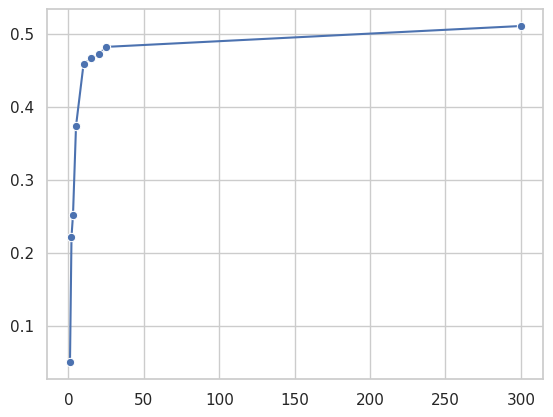

In [147]:
sns.lineplot(x=comps_lst, y=lst, marker='o')